FINALIZANDO A CLASSE VALOR
==========================



<hr>

## INTRODUÇÃO



Chegou a hora de finalizar a classe `Valor`!



## OBJETIVO



O objetivo é fazer com que a classe `Valor` seja capaz de realizar algumas **operações necessárias** para que seja usada na nossa rede neural artificial.



> <hr>

## IMPORTAÇÕES



In [1]:
import math # tem que importar ele nas classes
from funcoes import plota_grafo

> <hr>

## CÓDIGOS E DISCUSSÃO



> #### FINALIZANDO A CLASSE `VALOR`

Aqui está a classe `Valor` assim como feita na aula anterior. Vamos modificá-la para cumprir nossos objetivos (ver objetivos na próxima seção).



In [2]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""): # só roda quando criamos uma instância
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        if not isinstance(outro_valor, Valor): # o problema é se não for uma instância 
                                                # condicional chegando se o outro valor é uma instância da classe valor
            outro_valor = Valor(outro_valor) # trannforma a não instância em uma instância então
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_adicao():
            self.grad += saida.grad * 1
            outro_valor.grad += saida.grad * 1

        saida.propagar = propagar_adicao

        return saida
    
    def __radd__(self, outro_valor): # outro_valor + self
                                        # correção de erro
        return self + outro_valor # primeiro argumento é sempre self

    def __mul__(self, outro_valor):
        if not isinstance(outro_valor, Valor): 
            outro_valor = Valor(outro_valor) 
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_multiplicacao():
            self.grad += saida.grad * outro_valor.data
            outro_valor.grad += saida.grad * self.data

        saida.propagar = propagar_multiplicacao

        return saida
    
    def __rmul__(self, outro_valor): # outro_valor + self
                                        # correção de erro
        return self * outro_valor
    
    def __pow__(self, expoente):
        
        assert isinstance(expoente, (int, float)) # se assegura de que isso é verdadeiro
        
        data = self.data ** expoente
        progenitor = (self, )
        operador_mae = f"**{expoente}" # é so uma string
        saida = Valor(data, progenitor, operador_mae)
        
        def propagar_exponenciacao():
            # gradiente de onde estou é o gradiente vezes o filho
            self.grad += saida.grad * expoente * (self.data ** (expoente - 1))

        saida.propagar = propagar_exponenciacao

        return saida
        

    def __truediv__(self, outro_valor): # self/outro_valor
        return self * outro_valor ** (-1)
    
    def __neg__(self): # - self
        return self * (-1)
    
    def __sub__(self, outro_valor):  # self - outro_valor
        return self + (- outro_valor)
    
    def __rsub__(self, outro_valor): # outro_valor - self
        return self * (-1) + outro_valor
    
    def exp(self): # calcular o exponencial de um número qualquer
        # math é quem calcula exponencias, a biblioteca de matemática
        data = math.exp(self.data)
        progenitor = (self, ) # função unária, o próprio valor # só tem um genitor
        operador_mae = "exp"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_exp():
            self.grad += saida.grad * data

        saida.propagar = propagar_exp

        return saida
    
    def sig(self):
        return self.exp() / (self.exp() + 1)
        
    def propagar(self):
        pass

    def propagar_tudo(self):
        ordem_topologica = []
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)

        self.grad = 1  # o gradiente do vértice folha deve ser 1

        for v in reversed(ordem_topologica):
            v.propagar()

<br>

> #### FINALIZANDO A CLASSE `VALOR`

> Antes de qualquer alteração, se rodarmos os objetivos, todos eles darão erro.

Quero poder acidionar uma instância de `Valor` com uma constante qualquer.



In [3]:
a = Valor(10, rotulo="a")
b = a + 1
print(b)

Valor(data=11)


Quero poder multiplicar uma instância de `Valor` com uma constante qualquer.



In [4]:
a = Valor(10, rotulo="a")
b = a * 10 # init roda para o a, não para o dez
print(b)

Valor(data=100)


> Adicionando 'ifinstance' dentro dos métodos dunder 'add' e 'mul', conseguimos fazer com que as duas células acima funcionassem. Contudo, ainda não é o suficiente para que as próximas funcionem.

Quero poder acidionar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



In [5]:
a = Valor(10, rotulo="a")
b = 1 + a
print(b)

Valor(data=11)


Quero poder multiplicar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



In [6]:
a = Valor(10, rotulo="a")
b = 10 * a
print(b)

Valor(data=100)


> Adicionando os métodos dunder 'radd' e 'rmul', conseguimos fazer com que as duas células acima funcionassem. Contudo, também ainda não é o suficiente para que as próximas funcionem.

Quero poder aplicar a função exponencial ($e^x$) em uma instância de `Valor`, computando corretamente o gradiente local desta operação.



In [7]:
a = Valor(1, rotulo="a")
b = a.exp()
print(b)

Valor(data=2.718281828459045)


> Com essas alterações, agora se tornou possível propagar o gradiente.

Quero poder elevar uma instância de `Valor` a um número real qualquer. **Nota**: não vai funcionar se fizer um `Valor` elevado a outro `Valor` pois vamos propagar os gradientes apenas considerando que estamos elevando a uma constante qualquer.



In [8]:
a = Valor(10, rotulo="a")
b = a**2 # valor elevado a uma constante
print(b)

Valor(data=100)


> Para a execução dessa célula, foi necessário que escrevêssemos um método para a exponenciação (__pow__).

Quero poder dividir uma instância de `Valor` por outra instância de `Valor`.



Valor(data=0.5)


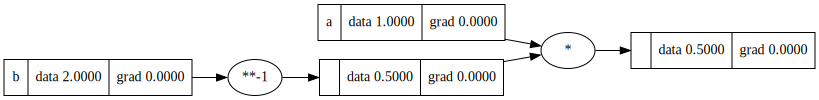

In [9]:
a = Valor(1, rotulo="a")
b = Valor(2, rotulo="b")
c = a / b
print(c)

plota_grafo(c)

> Para tornar o cálculo da célula anterior possível, construímos o método 'truediv'.

Quero poder computar o negativo de uma instância de `Valor`.



In [10]:
a = Valor(1, rotulo="a")
b = -a
print(b)

Valor(data=-1)


> Aqui, foi necessário a implantação do método 'neg'.

Quero poder subtrair uma instância de `Valor` por outra instância de `Valor`.



In [11]:
a = Valor(10, rotulo="a")
b = Valor(3, rotulo="b")
c = a - b
print(c)

Valor(data=7)


> Para este caso, fizemos uso do método 'sub'. E, concomitantemente, desenvolvemos o método 'rsub'.

E, finalmente, quero poder aplicar a função sigmoide (também conhecida como logística) a uma instância de `Valor`. A função sigmoide é a seguinte:

$$
S(x) = \frac{e^x}{e^x + 1}
$$



Valor(data=0.7310585786300048)



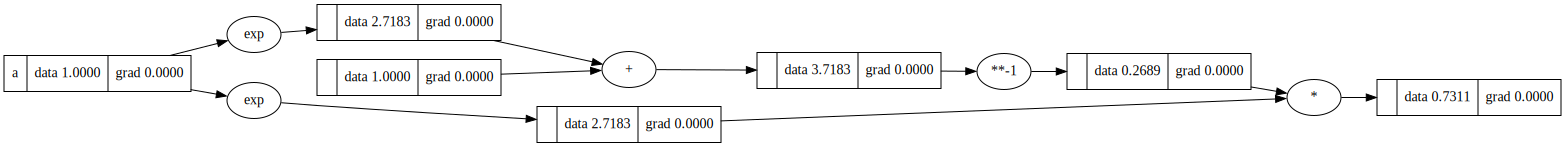

In [13]:
a = Valor(1, rotulo="a")
b = a.sig()
print(b)
print()
plota_grafo(b)

> Por último, mas não menos importante, o método 'sig', que alude à curva sigmoide, nos auxilia na resolução do último objetivo.

> <hr>

## Conclusão



<div style=' text-align: justify; text-justify: inter-word;'>
À primeira vista, esse notebook pode parecer um pouco desproposital, com algumas informações soltas. Contudo, não é bem assim. Aqui, conseguimos acompanhar a finalização da classe valor e de todos os componentes. Mais do que isso, conseguimos ver para que eles servem na prática, conseguimos entender melhor como cada componente atua. Isso é extremamente fundamental porque classe é uma ferramenta muito relevante para o desenvolvimento de redes neurais, elas são invariavelmente usadas, então, para entender com o que se está trabalhando e o que está sendo feito, é melhor que o passo a passo seja explorado calmamente e, preferencialmente, de maneira visual também.

<hr>

## Playground

